In [1]:
#!pip install --upgrade gensim

In [2]:
import pandas as pd
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
%run preprocess.ipynb

In [4]:
%%time
df['clean_text'] = df['text'].apply(preprocess2)

Wall time: 22.7 s


In [5]:
df.to_csv("bbc_preprocessed2.csv")

In [6]:
df.head(15)

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,future viewer theatre system plasma digital re...
1,business,worldcom boss left books alone former worldc...,worldcom former worldcom bernie ebbers accused...
2,sport,tigers wary of farrell gamble leicester say ...,tiger farrell gamble leicester rushed making f...
3,sport,yeading face newcastle in fa cup premiership s...,yeading newcastle premiership newcastle united...
4,entertainment,ocean s twelve raids box office ocean s twelve...,twelve office twelve sequel starring george cl...
5,politics,howard hits back at mongrel jibe michael howar...,howard mongrel michael howard leader acting at...
6,politics,blair prepares to name poll date tony blair is...,prepares likely election parliament return eas...
7,sport,henman hopes ended in dubai third seed tim hen...,henman henman slumped straight defeat ljubicic...
8,sport,wilkinson fit to face edinburgh england captai...,wilkinson edinburgh england captain wilkinson ...
9,entertainment,last star wars not for children the sixth an...,child suitable child george minute revenge dar...


In [7]:
df.shape

(2225, 3)

In [8]:
#need corpus as list of list
docs =[]
for d in df.clean_text:
    docs.append(d.split())

In [9]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.80)

In [10]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [11]:
print(dictionary)

Dictionary(2028 unique tokens: ['according', 'advert', 'advertising', 'allows', 'already']...)


In [12]:
print(corpus[:5])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 5), (21, 2), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 2), (29, 4), (30, 1), (31, 1), (32, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 2), (52, 2), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 5), (77, 1), (78, 1), (79, 7), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 4), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 3), (98, 1), (99, 1), (100, 2), (101, 2), (102, 2), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1)

In [13]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2028
Number of documents: 2225


In [14]:
%%time
# Train LDA model.
from gensim.models import LdaModel

model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    passes=50)

Wall time: 1min 43s


In [15]:
from pickle import dump
dump(model,open("ldamodel.pkl",'wb'))

In [16]:
from pickle import load
model = load(open('ldamodel.pkl', 'rb'))

In [17]:
top_topics = model.top_topics(corpus,topn=5)

from pprint import pprint
pprint(top_topics)

[([(0.017226316, 'government'),
   (0.015916467, 'labour'),
   (0.015139897, 'people'),
   (0.014762139, 'election'),
   (0.014679633, 'minister')],
  -0.8945996499732379),
 ([(0.023325838, 'people'),
   (0.019686844, 'mobile'),
   (0.016035492, 'technology'),
   (0.011943467, 'service'),
   (0.010295409, 'network')],
  -1.280890209249919),
 ([(0.020250719, 'market'),
   (0.014601627, 'growth'),
   (0.014426746, 'economy'),
   (0.013159131, 'dollar'),
   (0.011827731, 'profit')],
  -1.6414115509360225),
 ([(0.013590692, 'player'),
   (0.011642367, 'england'),
   (0.008016769, 'second'),
   (0.0076094903, 'award'),
   (0.0067853597, 'number')],
  -1.9910380519860849),
 ([(0.023039313, 'company'),
   (0.008952231, 'industry'),
   (0.007996488, 'olympic'),
   (0.0079769455, 'airline'),
   (0.0074931243, 'shareholder')],
  -5.281085719341737)]


In [18]:
model.print_topics(num_words=10)

[(0,
  '0.023*"people" + 0.020*"mobile" + 0.016*"technology" + 0.012*"service" + 0.010*"network" + 0.009*"search" + 0.009*"computer" + 0.009*"information" + 0.009*"digital" + 0.008*"software"'),
 (1,
  '0.017*"government" + 0.016*"labour" + 0.015*"people" + 0.015*"election" + 0.015*"minister" + 0.010*"public" + 0.009*"country" + 0.007*"leader" + 0.007*"howard" + 0.006*"conservative"'),
 (2,
  '0.014*"player" + 0.012*"england" + 0.008*"second" + 0.008*"award" + 0.007*"number" + 0.006*"ireland" + 0.006*"british" + 0.006*"minute" + 0.006*"really" + 0.006*"record"'),
 (3,
  '0.023*"company" + 0.009*"industry" + 0.008*"olympic" + 0.008*"airline" + 0.007*"shareholder" + 0.007*"holmes" + 0.007*"executive" + 0.006*"decision" + 0.006*"charge" + 0.006*"child"'),
 (4,
  '0.020*"market" + 0.015*"growth" + 0.014*"economy" + 0.013*"dollar" + 0.012*"profit" + 0.011*"economic" + 0.011*"analyst" + 0.011*"price" + 0.010*"company" + 0.010*"figure"')]

In [19]:
len(top_topics)

5

In [20]:
# Create a new corpus, made of previously unseen documents.
other_texts = [
    ['computer', 'time', 'mobile'],
    ['vote', 'election', 'candidate'],
    ['defeat', 'player', 'cup', 'england','cricket']
]
other_corpus = [dictionary.doc2bow(text) for text in other_texts]

In [21]:
unseen_doc = other_corpus[2]
vector = model[unseen_doc]  # get topic probability distribution for a document
vector

[(0, 0.050210234),
 (1, 0.050039046),
 (2, 0.7997031),
 (3, 0.050001334),
 (4, 0.05004626)]

In [22]:
for d in other_corpus:
    vector = model[d]
    print(vector)

[(0, 0.7333173), (1, 0.06666733), (2, 0.06666733), (3, 0.06668066), (4, 0.06666734)]
[(0, 0.06666992), (1, 0.73294574), (2, 0.0670108), (3, 0.06667005), (4, 0.06670348)]
[(0, 0.050210126), (1, 0.050039053), (2, 0.7997032), (3, 0.050001338), (4, 0.050046265)]


In [23]:
#docs[500]
other_corpus[1]

[(296, 1), (1101, 1)]

In [24]:
vector = model[corpus[800]]  # get topic probability distribution for a document
vector

[(0, 0.8213996), (3, 0.08584754), (4, 0.08998311)]

In [25]:
top = pd.DataFrame()
top['text'] = df['text']
top['category'] = df['category']

In [26]:
import numpy as np

In [27]:
tscore=[]
for doc in corpus:
    vector = model[doc]
    t = np.zeros(5,dtype=float)
    for v in vector:
        temp=np.around(v[1],4)
        t[v[0]]=temp
    tscore.append(t)
#tscore    

In [28]:
len(tscore[3])

5

In [29]:
for i in range(0,5):
    top['t'+str(i)]= [ x[i] for x in tscore]

In [30]:
top.sample(5)

,text,category,t0,t1,t2,t3,t4
524,disney backs sony dvd technology a next genera...,tech,0.8409,0.0,0.1263,0.0000,0.0275
2159,wal-mart is sued over rude lyrics the parents ...,entertainment,0.0000,0.0,0.0000,0.9786,0.0000
2103,ds aims to touch gamers the mobile gaming indu...,tech,0.7417,0.0,0.0000,0.0000,0.2539
474,nintendo adds media playing to ds nintendo is ...,tech,0.7213,0.0,0.0000,0.0000,0.2683
282,consumers snub portable video consumers want...,tech,0.8440,0.0,0.0000,0.0000,0.1502


#Choosing best k

https://radimrehurek.com/gensim/models/coherencemodel.html

In [31]:
from gensim.models.coherencemodel import CoherenceModel

In [32]:
def get_coherence_scores(corpus, dictionary, min, max):
    co_scores = []
    for i in range(min,max+1):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=i,passes=10)
        coherence_model = CoherenceModel(model=model,corpus=corpus,dictionary=dictionary,coherence='u_mass')
        co_scores.append(coherence_model.get_coherence())
    return co_scores

In [33]:
get_coherence_scores(corpus, dictionary, 2, 10)

[-1.838335805038572,
 -1.836370898049274,
 -1.8926113626024974,
 -1.7374939349770913,
 -2.093868432426407,
 -2.8498586840863505,
 -2.285784462314279,
 -2.313153864394497,
 -2.7172261142128407]

https://pypi.org/project/pyLDAvis/

In [34]:
#!pip install pyldavis

In [35]:
from pyLDAvis.gensim_models import prepare
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = prepare(model, corpus, dictionary)
LDAvis_prepared

G:\anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.018569 -0.042565       1        1  26.577602
2      0.162828  0.014164       2        1  25.735481
0      0.040566 -0.175752       3        1  21.862517
4     -0.243585 -0.004523       4        1  14.958085
3      0.021621  0.208676       5        1  10.866315, topic_info=           Term         Freq        Total Category  logprob  loglift
70       mobile   816.000000   816.000000  Default  30.0000  30.0000
25      company  1056.000000  1056.000000  Default  29.0000  29.0000
313      labour   796.000000   796.000000  Default  28.0000  28.0000
111  technology   675.000000   675.000000  Default  27.0000  27.0000
68       market   801.000000   801.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
501      london   106.313660   488.071356   Topic5  -5.2594   0.6954
139      former    99.399484   394.178168   Topic5  -5.3267   0.8418
391     british   103.778449   641.431234   Topic5  -5.2836   0.3981
199     whether    91.482419   257.404760   Topic5  -5.4097   1.1850
68       market    91.780471   801.148293   Topic5  -5.4064   0.0529

[334 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1708      2  0.997449    academy
609       5  0.959366   accident
0         1  0.100419  according
0         3  0.438416  according
0         4  0.379634  according
...     ...       ...        ...
1000      4  0.039332   williams
879       2  0.976946     winner
879       3  0.021872     winner
1202      3  0.992681   wireless
1392      2  0.996994   woodward

[626 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 4])

In [36]:
co_scores = [0.4610136638695459,
 0.5012036717240692,
 0.5251576709291084,
 0.505374985367257,
 0.4595908442249221,
 0.49884820621712916,
 0.4824706105233135,
 0.45159554391161244,
 0.45109461571233994]

G:\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


G:\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
G:\anaconda\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


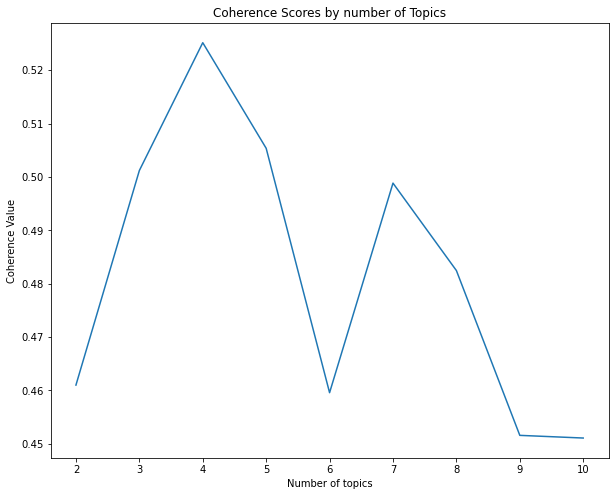

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
x = [int(i) for i in range(2,11)]
plt.figure(figsize=(10,8))
plt.plot(x, co_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores by number of Topics')
plt.show()
